In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from tqdm import tqdm, tqdm_notebook
import numpy as np


In [3]:
total_data=pd.read_csv('../../Data/new_data_lang_without_spam_translated_BERT_pred.csv')

In [4]:
total_data.sort_values(by=['timestamp'],inplace=True)

In [199]:
count=0
for index,row in tqdm_notebook(total_data.iterrows()):
    try:
        temp=row['translated']
    except:
        count+=1

In [209]:
total_data['translated'].isna().sum()/len(total_data)

0.07229107142857143

In [98]:
fear_speech_temp=total_data[total_data['pred_probab']>0.8]
no_fear_speech_temp=total_data[total_data['pred_probab']<=0.8]

23232

In [6]:
list_users=list(fear_speech_temp.phone_num_anonymized.unique())
list_groups=list(fear_speech_temp.group_id_anonymized.unique())


In [7]:
11 Apr 2019 – 23 May 2019

[2139,
 5045,
 766,
 961,
 3606,
 1527,
 4178,
 4936,
 3944,
 1265,
 2314,
 4381,
 3384,
 4338,
 5050,
 1769,
 4596,
 2345,
 2761,
 2816,
 1545,
 1012,
 2385,
 1040,
 3852,
 1268,
 4860,
 3598,
 1886,
 4604,
 2721,
 2292,
 994,
 3334,
 4147,
 1587,
 2580,
 3551,
 3549,
 1213,
 473,
 2669,
 4364,
 3939,
 2310,
 4245,
 2708,
 2756,
 2710,
 3006,
 2608,
 3591,
 869,
 874,
 4613,
 2078,
 3937,
 1619,
 2223,
 1690,
 785,
 3013,
 801,
 526,
 558,
 538,
 4374,
 3417,
 594,
 3466,
 2568,
 2426,
 3035,
 425,
 1553,
 4590,
 3592,
 5081,
 2839,
 1002,
 4052,
 576,
 2793,
 532,
 464,
 5093,
 5077,
 5090,
 5073,
 5087,
 5079,
 5086,
 5089,
 1732,
 795,
 486,
 5071,
 469,
 3856,
 535,
 474,
 3589,
 1003,
 2551,
 2224,
 2661,
 1768,
 5085,
 531,
 504,
 1973,
 5095,
 560,
 527,
 1841,
 488,
 542,
 521,
 508,
 5110,
 2142,
 3483,
 4388,
 2810,
 2163,
 523,
 528,
 2449,
 516,
 430,
 445,
 2418,
 3849,
 518,
 477,
 5078,
 1799,
 3612,
 543,
 481,
 501,
 533,
 495,
 506,
 562,
 537,
 547,
 467,
 468,
 539

In [ ]:
total_data_in_groups=total_data.groupby('group_id_anonymized')

temp_group_user=[]

for group in tqdm_notebook(list_groups):
    temp=total_data_in_groups.get_group(group)
    print(temp.head())
    temp_group_user.append(temp)

In [9]:
fear_speech_groups=pd.concat(temp_group_user,ignore_index=True)
    

In [10]:
def data_stats(df):
    df_grouped=df.groupby('group_id_anonymized')
    
    df_users=df.groupby('phone_num_anonymized')
    user_per_group=df.groupby('group_id_anonymized').phone_num_anonymized.nunique()
    ###average_user
    average_user =0
    for user in user_per_group.items():
        average_user+=user[1]
    average_user/= len(df_grouped)
    ###average_message
    average_message=0
    for group in df_grouped.groups.keys():
        average_message+=len(df_grouped.get_group(group))
    average_message/= len(df_grouped)   
    
    ###average message length in chars
#     sum1=0
#     for index,row in tqdm.notebook(df.iterrows(),total=df.shape[0]):
#         sum1+=len(list(row["message_text"]))
#     average_message_length= sum1/len(df)
        
    
    
    
    print("Total dataset:-",len(df))
    print("Total groups:-",len(df_grouped))
    print("Total users:-",len(df_users))
    print("Total languages :-",len(df.groupby('lang')))
    print("Average number of user per group:-",average_user)
    print("Average number of messages per group:-",average_message)
    #print("Average number of message length per group:-",average_message_length)
    

In [11]:
data_stats(fear_speech_groups)

Total dataset:- 1097726
Total groups:- 1550
Total users:- 70723
Total languages :- 11
Average number of user per group:- 58.37225806451613
Average number of messages per group:- 708.2103225806452


In [28]:
from utils_function import convert,convert_reverse
import matplotlib
import matplotlib.pyplot as plt


matplotlib.rc('font', **font)

%matplotlib inline
    
def distribution_of_hate(wp_data):
    list_hate=[]
    
    start_time=total_data.iloc[0]['timestamp']
    end_time=total_data.iloc[-1]['timestamp']
    
    num_days=int((end_time-start_time)/(24*60*60*1000))
    print(num_days)
    for i in tqdm_notebook(range(num_days)):
        data_of_the_day = wp_data[wp_data['timestamp'].between(start_time+i*(24*60*60*1000),start_time+(i+1)*(24*60*60*1000) , inclusive=True)]
        list_hate.append(len(data_of_the_day))
    data = pd.DataFrame(np.array([list_hate]).T, columns=["fear speech"])
    matplotlib.rcParams['figure.figsize'] = (15, 6)
    data.plot()
    
    start_election = convert(2019,4,11)
    end_election = convert(2019,5,23)
    pulwama_event= convert(2019,2,14)
    balakot_event=convert(2019,2,27)
    
        
    
    
    day_start=int((start_election-start_time)/(24*60*60*1000))   
    day_end=int((end_election-start_time)/(24*60*60*1000))   
    plt.axvline(day_start, linestyle='--', color='r')
    for i in range(day_start+1,day_end):
        plt.axvline(i, linestyle='--',alpha=0.2, color='r')
    plt.axvline(day_end, linestyle='--', color='r')
    
    day_pulwama=int((pulwama_event-start_time)/(24*60*60*1000))
    day_balakot=int((balakot_event-start_time)/(24*60*60*1000))
    
    plt.axvline(day_pulwama, linestyle='--',alpha=0.5, color='k',linewidth=1.5)
    plt.axvline(day_balakot, linestyle='--',alpha=0.5, color='k',linewidth=1.5)
    
    
    x_tick_keys=[]
    x_tick_label=[]
    
    for year in [2018,2019]:
        for month in range(1,13):
            if(year==2019 and month==3):
                continue
                
            timestamp_begin_month=convert(year,month,1)
            if(timestamp_begin_month>start_time and timestamp_begin_month<end_time):
                first_day_month =int((timestamp_begin_month-start_time)/(24*60*60*1000))
                x_tick_keys.append(first_day_month)
                x_tick_label.append(str(month)+'/'+str(year))
    
    
    #### for pulwama +balakot
    x_tick_keys.append(day_pulwama)
    x_tick_label.append('pulwama event')
    
    x_tick_keys.append(day_balakot)
    x_tick_label.append('balakot event')
    
    x_tick_keys.append(day_start)
    x_tick_label.append('election start')
    
    x_tick_keys.append(day_end)
    x_tick_label.append('election end')
    
    
    
    plt.xticks(x_tick_keys, x_tick_label, rotation=60)
    
    plt.xlabel('days')
    plt.ylabel('number of fear speech messages')
    plt.legend()
    
    plt.savefig('Results/Whatsapp_usage_of_keywords.jpg',bbox_inches='tight',dpi=400)
    plt.show()
    return list_hate

In [ ]:
distribution_of_hate(fear_speech_temp)

In [89]:
fear_speech_temp

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,group_id_anonymized,lang,message_text,phone_num_anonymized,timestamp,translated,preds,pred_probab
1115793,1115793,1115793,1701155,1701155.0,NaN,2139,hi,जब भी मुसलमानों के खिलाफ़ कोई मामला पेश आता है...,211399,1540667277000,NaN,1,0.973330
1115794,1115794,1115794,1701154,1701154.0,NaN,5045,hi,जब भी मुसलमानों के खिलाफ़ कोई मामला पेश आता है...,211399,1540667277000,"Whenever a case is presented against Muslims, ...",1,0.973330
1115797,1115797,1115797,1701158,1701158.0,NaN,2139,hi,Arvind Kejriwal Rahul Gandhi दिल्ली में 8 साल ...,211399,1540670450000,NaN,1,0.984998
1115798,1115798,1115798,1701159,1701159.0,NaN,5045,hi,Arvind Kejriwal Rahul Gandhi दिल्ली में 8 साल ...,211399,1540670485000,Arvind Kejriwal Rahul Gandhi Stay silent on th...,1,0.984998
1115806,1115806,1115806,1701174,1701174.0,NaN,766,hi,आज फिर मुसलमान पूछ रहे है मदरसे में पडने वाले ...,38878,1540676046000,"Today again, Muslims are asking what #Owaisi s...",1,0.973222
1115807,1115807,1115807,1701175,1701175.0,NaN,961,hi,आज फिर मुसलमान पूछ रहे है मदरसे में पडने वाले ...,38878,1540676058000,"Today again, Muslims are asking what #Owaisi s...",1,0.973222
1115815,1115815,1115815,1701189,1701189.0,NaN,766,hi,किसी क़ौम को बर्बाद करने के लिए उस क़ौम की बदक...,85513,1540696538000,"It is enough to ruin a nation, and it is enoug...",1,0.984268
1115825,1115825,1115825,1701201,1701201.0,NaN,3606,hi,"*हिंदु मुसलमान,हिंदु मुसलमान करने वालों ये देख...",147643,1540705836000,"* Hindus Muslims, Hindus Muslims who see this,...",1,0.950737
1115864,1115864,1115864,1701251,1701251.0,NaN,1527,hi,ये वो मजलूम बाप है जो अपने 8 सालह नन्हे से फूल...,170949,1540716631000,😢 😢 😢 😢,1,0.979803
1116037,1116037,1116037,1701331,1701331.0,NaN,4178,hi,सवाल पूछा गया कि मोहब्बत क्या है? जवाब आया कि ...,86709,1540736921000,The question was asked what is love? The answe...,1,0.951772


In [159]:
import seaborn
fear_speech_groups=fear_speech_temp.groupby('phone_num_anonymized')

list_keys=[]
for key in fear_speech_groups.groups.keys():
    length=len(fear_speech_groups.get_group(key))
    
    list_keys.append((key,length))
    


In [161]:
temp=pd.DataFrame(list_keys,columns=['user_id','num_fear_speech'])
# #temp=temp.set_index('groups')
temp.sort_values(by=['num_fear_speech'],inplace=True,ascending=False)

In [94]:
#temp[0:10].plot.bar()

      user_id  num_fear_speech
313     30200              302
190     26975              291
6335   192098              243
191     26976              230
3849   125710              210


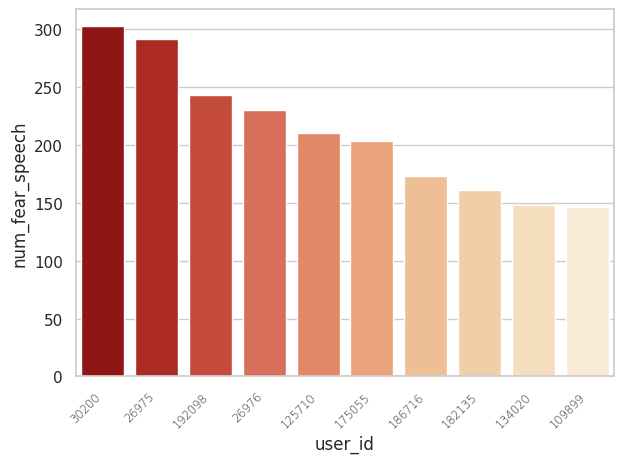

In [162]:
# df=pd.DataFrame(lists,columns=[x_axis,y_axis,category])
import matplotlib.style as style
import matplotlib.pyplot as plt
import pandas as pd
style.use('default') #sets the size of the charts
import seaborn as sns
sns.set(style="whitegrid")


print(temp.head(5))



ax = sns.barplot(x=temp.columns[0], y=temp.columns[1],data=temp[0:10],orient="v",palette="OrRd_r",order=temp.sort_values('num_fear_speech',ascending=False).user_id[0:10])
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'

)



fig = ax.get_figure()
plt.tight_layout()
plt.savefig('Results/top_10_groups.jpg',bbox='tight',dpi=400)
#plt.show()


In [105]:
from urlextract import URLExtract
import tldextract
ext = tldextract.extract('www.twitter.co/MF6mvzSBDs?ssr=true')
print(ext.subdomain, ext.domain, ext.suffix)


extractor = URLExtract()
urls = extractor.find_urls("Text with URLs. Let's have URL janlipovsky.cz as an example.")
print(urls)

www twitter co
['janlipovsky.cz']


In [119]:
all_url_shared={}


In [131]:
def return_url_dict(df):
    count=0
    url_dict={}
    for text in tqdm_notebook(fear_speech_temp.message_text):
        urls = extractor.find_urls(text)
        if(len(urls)>0):
            for url in urls:
                splited=url.split('/')
                if(len(splited)>=3 and splited[2]=='youtu.be'):
                    urlkey='youtube.com'
                elif(len(splited)>=3 and splited[2]=='t.co'):
                    urlkey='telegram.com'
                elif(len(splited)>=3 and splited[2]=='g.co'):
                    urlkey='google.com'
                elif(len(splited)>=3 and splited[2]=='wp.me'):
                    urlkey='wordpress.com'
                elif(len(splited)>=3 and splited[2]=='bit.ly'):
                    continue
                else:
                    ext = tldextract.extract(url)
                    urlkey=ext.domain+'.'+ext.suffix
                try:
                    url_dict[urlkey]+=1
                except:
                    url_dict[urlkey]=1
            count+=1
    print(count)
    return url_dict

In [132]:
all_url_shared['fear speech']=return_url_dict(fear_speech_temp)


1879


In [133]:
all_url_shared['not fear speech']=return_url_dict(no_fear_speech_temp)


1879


In [226]:
def rank_order_difference(all_url_shared,key1,key2):
    tuples_A=sorted(all_url_shared[key1].items(), key=lambda item: item[1],reverse=True)
    tuples_B=sorted(all_url_shared[key2].items(), key=lambda item: item[1],reverse=True)
    
    dict_A={}
    count=0
    for ele in tuples_A:
        if(count<40):
            count+=1
        dict_A[ele[0]]=count
    
    dict_B={}
    count=0
    for ele in tuples_B:
        if(count<40):
            count+=1
        dict_B[ele[0]]=count
    
    rank_diff_A={}
    for key in dict_A.keys():
        try:
            rank_diff_A[key]=dict_B[key]-dict_A[key]
        except:
            rank_diff_A[key]=40-dict_A[key]
    rank_diff_B={}
    for key in dict_B.keys():
        try:
            rank_diff_B[key]=dict_A[key]-dict_B[key]
        except:
            rank_diff_B[key]=40-dict_B[key]
            
    return rank_diff_A,rank_diff_B 

In [126]:
rank_diff_A,rank_diff_B =rank_order_difference(all_url_shared,'fear speech','not fear speech')

In [127]:
sorted(rank_diff_B.items(), key=lambda item: item[1],reverse=True)[0:10]

[('washop.in', 30),
 ('dhunt.in', 29),
 ('vnxpres.com', 25),
 ('b.tech', 24),
 ('keralaonlinenews.com', 23),
 ('tiktok.com', 20),
 ('videoohot.com', 19),
 ('crosstownnews.in', 18),
 ('3.room', 17),
 ('ylink.cc', 16)]

In [129]:
[ele[0] for ele in sorted(rank_diff_A.items(), key=lambda item: item[1],reverse=True)[0:10]]

['azaadbharat.org',
 'wordpress.com',
 'alislamiclink.com',
 'ddbharti.in',
 'opf.edu.pk',
 'timesofindia.com',
 'bharatyogi.net',
 'jagrukindian.com',
 'sudarshannews.in',
 'bharti.news']

In [211]:
from features import *

<Figure size 10000x30000 with 0 Axes>

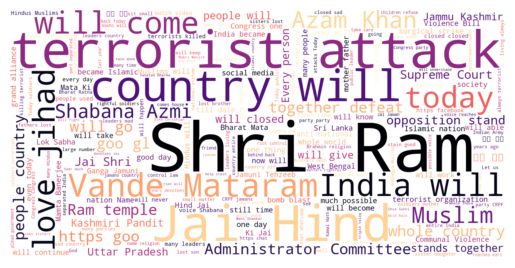

In [152]:
generate_word_cloud(fear_speech_temp,'fear speech')

In [147]:
from wordcloud import WordCloud,STOPWORDS

WordCloud()

wordcloud.wordcloud.WordCloud

In [165]:
dict_fear_speech=get_empath_categories(fear_speech_temp)
dict_not_fear_speech=get_empath_categories(no_fear_speech_temp)


100%|██████████| 1656768/1656768 [00:03<00:00, 416104.94it/s]


In [168]:
list_all=[]
for key in ['violence','fear','crime','hate','aggression','weapon','negative_emotion']:
    list_all.append((dict_fear_speech[key],key,'fear speech'))
    list_all.append((dict_not_fear_speech[key],key,'not fear speech'))


In [192]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')     # switch to seaborn styledict1={}
#sum1=0
import matplotlib

from utils_plotting import *

   empath value empath category             type
0      0.002985        violence      fear speech
1      0.001549        violence  not fear speech
2      0.001134            fear      fear speech
3      0.000629            fear  not fear speech
4      0.004397           crime      fear speech


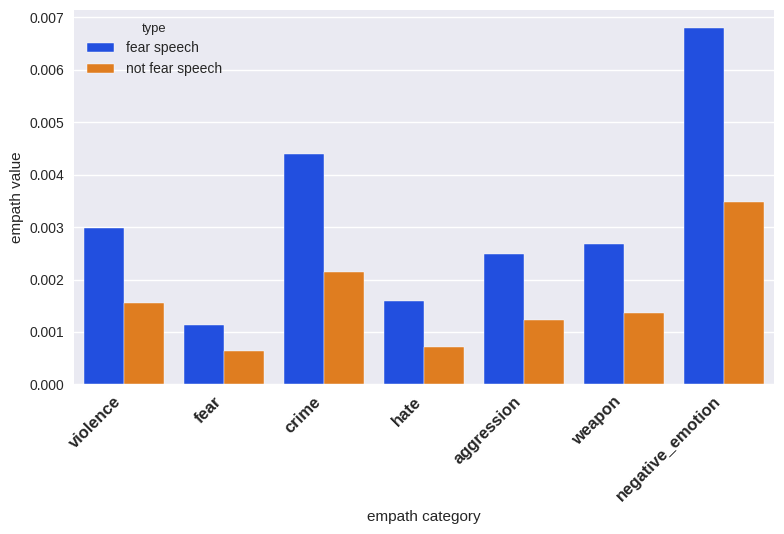

In [194]:
plotmultibar(list_all,'empath value','empath category','type',title='fear speech vs not fear speech',to_save=True)

In [214]:
import emoji

import re
import emoji
def extract_emojis(str1):
    try:
        return [c for c in str1 if c in emoji.UNICODE_EMOJI]
    except AttributeError:
        return []

def extract_emojis_index(str1):
    try:
        return [(i,c) for i,c in enumerate(str1) if c in emoji.UNICODE_EMOJI]
    except AttributeError:
        return []


In [215]:
emoji_dict_normal={}

for index,row in tqdm_notebook(no_fear_speech_temp.iterrows(),total=no_fear_speech_temp.shape[0]):
    #print(row["message_text"])
    list_emojis=set(extract_emojis(row['message_text']))
    #print(list_emojis)
    
    for emoji_this in list_emojis:
        try:
            emoji_dict_normal[emoji_this]+=1
        except KeyError:
            emoji_dict_normal[emoji_this]=1


In [217]:
emoji_dict_fear={}

for index,row in tqdm_notebook(fear_speech_temp.iterrows(),total=fear_speech_temp.shape[0]):
    #print(row["message_text"])
    list_emojis=set(extract_emojis(row['message_text']))
    #print(list_emojis)
    
    for emoji_this in list_emojis:
        try:
            emoji_dict_fear[emoji_this]+=1
        except KeyError:
            emoji_dict_fear[emoji_this]=1


In [231]:
all_emoji_shared={}
all_emoji_shared['fear_speech']=emoji_dict_fear
all_emoji_shared['not_fear_speech']=emoji_dict_normal


In [232]:
rank_diff_A,rank_diff_B =rank_order_difference(all_emoji_shared,'fear_speech','not_fear_speech')

In [271]:
[ele[0] for ele in sorted(rank_diff_A.items(), key=lambda item: item[1],reverse=True)[0:10]]

['😡', '🐚', '🏽', '⛳', '🏹', '😎', '💪', '😳', '🔱', '👊']

In [274]:
fear_speech_keywords=[ele[0] for ele in sorted(rank_diff_A.items(), key=lambda item: item[1],reverse=True)[0:10]]

In [275]:
fear_speech_keywords

['😡', '🐚', '🏽', '⛳', '🏹', '😎', '💪', '😳', '🔱', '👊']

In [259]:
shape=len(fear_speech_keywords)

coccur=np.zeros((shape,shape))

for index,row in tqdm_notebook(fear_speech_temp.iterrows(),total=fear_speech_temp.shape[0]):
    list_emojis=extract_emojis_index(row['message_text'])
    for i in range(0,len(list_emojis)-1):
        for j in range(i+1,len(list_emojis)-1):
            try:
                if(abs(list_emojis[i][0]-list_emojis[j][0])<20):
                    index_row=fear_speech_keywords.index(list_emojis[i][1])
                    index_column=fear_speech_keywords.index(list_emojis[j][1])
                    coccur[index_row][index_column]+=1
                    coccur[index_column][index_row]+=1
            except:
                pass

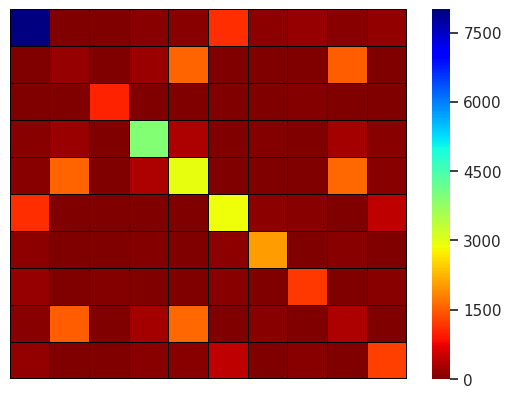

In [276]:
ax = sns.heatmap(coccur,cmap='jet_r',linewidth=0.01,linecolor='black',vmax=8000, xticklabels=False,yticklabels=False)
fig = ax.get_figure()
fig.savefig('Results/heatmap.jpg',dpi=400)


In [ ]:
'''
Code files and plots generated and data used  : corpus_analysis_26thApril.csv
Codes written in R - initial_test_cleaning2_27thApril.R
Plots : 
1. CCDF of Inter-Arrival Time (IAT) of posts) --- CCDF_inter_arrival_time_27thAprill.png --- Demonstrate heavy-tailed behavior
like standard social media postings
2. Bar graph of language shift versus IAT --- iat_bar_chart_lang_chg_group_28thApril --- Observation the language shift 
increases significantly once it goes over 10 minutes. Also when IAT is small, the language does not usually change
____________________________________________________________________________________________________________________
Formal Documentation starts now ...
____________________________________________________________________________________________________________________
There are 250 unique anonymized_group_ids

Minimum timestamp : Thursday, February 7, 2019 10:43:28 PM GMT+05:30
Maximum timestamp : Friday, February 8, 2019 4:49:21 PM GMT+05:30

timestamp field is in milliseconds
Scaled by substracting with minimum timestamp value and converting to seconds

Exploring Whatsapp Group level properties : 

Top 5 whatsapp groups in terms of highest number of posts
-group_id_anonymized -- total posts -- start time -- end time
1	4957	69	308 	65153
2	1116	36	294 	64908
3	5072	33	25689	64791
4	1460	27	20290	62194
5	1721	27	24992	64955

1. Inter-arrival time dist -

# Inter-arrival times follow a heavy-tailed distribution which is a common posting behavior by social media users
Added CCDF plot - CCDF_inter_arrival_time_27thAprill.png



2. Multilingual nature of Whatsapp dataset

Distribution of language of original message_text :  
bn  en  hi  ml  mr  ta  te  ur 
 1 231 462  69  24   4 207   2 
 
We now try to understand the quality of translation, for which we consider the top three most frequent languages in descending
order --> hi > en > te

After cleaning, with translated text with at least 100 ASCII characters, the language distribution becomes : 
 bn  en  hi  ml  mr  ta  te 
  1 118 295  21   6   1 127 
This leads to a reduced subset of 569 data points out of 1000
Percentage of useful translation and useful document in three most frequent languages for fear speech detection : 
en - 51%, hi - 63.9%, te - 61.4%


# Testing the language purity of the group. Also, is there any pattern when the language shifts
# Only 6 out of 53 (11.32%) Whatsapp groups (active groups, having more than 5 posts per day) are monolingual

# We now mention monolingual groups with language and id : hi - 530, 3016, 3371; en - 1898, 3339; ml - 4957
# 157 out of 648 is not first post and has language shift

# Observation the language shift increases significantly once it goes over 10 minutes. 
See Bar graph : iat_bar_chart_lang_chg_group_28thApril




3. LIWC analysis

 Ppron       Inhib             Space       Filler            Ipron        Time      Percept       
 Min.   :0   Min.   :0.00000   Min.   :0   Min.   :0.00000   Min.   :0   Min.   :0   Min.   :0.00000  
 1st Qu.:0   1st Qu.:0.00000   1st Qu.:0   1st Qu.:0.00000   1st Qu.:0   1st Qu.:0   1st Qu.:0.00000  
 Median :0   Median :0.00000   Median :0   Median :0.00000   Median :0   Median :0   Median :0.00000  
 Mean   :0   Mean   :0.01582   Mean   :0   Mean   :0.00703   Mean   :0   Mean   :0   Mean   :0.05097  
 3rd Qu.:0   3rd Qu.:0.00000   3rd Qu.:0   3rd Qu.:0.00000   3rd Qu.:0   3rd Qu.:0   3rd Qu.:0.00000  
 Max.   :0   Max.   :2.00000   Max.   :0   Max.   :1.00000   Max.   :0   Max.   :0   Max.   :8.00000  
     Verbs              Quant            Discrep     Relativ           Affect             You        Cause  
 Min.   :0.000000   Min.   :0.00000   Min.   :0   Min.   : 0.000   Min.   :0.00000   Min.   :0   Min.   :0  
 1st Qu.:0.000000   1st Qu.:0.00000   1st Qu.:0   1st Qu.: 2.000   1st Qu.:0.00000   1st Qu.:0   1st Qu.:0  
 Median :0.000000   Median :0.00000   Median :0   Median : 3.000   Median :0.00000   Median :0   Median :0  
 Mean   :0.008787   Mean   :0.09666   Mean   :0   Mean   : 5.223   Mean   :0.01054   Mean   :0   Mean   :0  
 3rd Qu.:0.000000   3rd Qu.:0.00000   3rd Qu.:0   3rd Qu.: 5.000   3rd Qu.:0.00000   3rd Qu.:0   3rd Qu.:0  
 Max.   :1.000000   Max.   :3.00000   Max.   :0   Max.   :77.000   Max.   :1.00000   Max.   :0   Max.   :0  
      Prep       Relig              Body        Bio                We        Assent             Incl  
 Min.   :0   Min.   : 0.0000   Min.   :0   Min.   : 0.0000   Min.   :0   Min.   :0.00000   Min.   :0  
 1st Qu.:0   1st Qu.: 0.0000   1st Qu.:0   1st Qu.: 0.0000   1st Qu.:0   1st Qu.:0.00000   1st Qu.:0  
 Median :0   Median : 0.0000   Median :0   Median : 0.0000   Median :0   Median :0.00000   Median :0  
 Mean   :0   Mean   : 0.8155   Mean   :0   Mean   : 0.3638   Mean   :0   Mean   :0.02109   Mean   :0  
 3rd Qu.:0   3rd Qu.: 0.0000   3rd Qu.:0   3rd Qu.: 0.0000   3rd Qu.:0   3rd Qu.:0.00000   3rd Qu.:0  
 Max.   :0   Max.   :46.0000   Max.   :0   Max.   :18.0000   Max.   :0   Max.   :3.00000   Max.   :0  
    Leisure            AuxVb        Hear             They       Posemo          Article       Excl  
 Min.   : 0.0000   Min.   :0   Min.   :0.0000   Min.   :0   Min.   : 0.000   Min.   :0   Min.   :0  
 1st Qu.: 0.0000   1st Qu.:0   1st Qu.:0.0000   1st Qu.:0   1st Qu.: 0.000   1st Qu.:0   1st Qu.:0  
 Median : 0.0000   Median :0   Median :0.0000   Median :0   Median : 1.000   Median :0   Median :0  
 Mean   : 0.5606   Mean   :0   Mean   :0.1845   Mean   :0   Mean   : 1.694   Mean   :0   Mean   :0  
 3rd Qu.: 0.0000   3rd Qu.:0   3rd Qu.:0.0000   3rd Qu.:0   3rd Qu.: 2.000   3rd Qu.:0   3rd Qu.:0  
 Max.   :16.0000   Max.   :0   Max.   :5.0000   Max.   :0   Max.   :35.000   Max.   :0   Max.   :0  
      Home            Friends     Present           Numbers     CogMech             I          Work       
 Min.   : 0.0000   Min.   :0   Min.   : 0.0000   Min.   :0   Min.   : 0.000   Min.   :0   Min.   : 0.000  
 1st Qu.: 0.0000   1st Qu.:0   1st Qu.: 0.0000   1st Qu.:0   1st Qu.: 0.000   1st Qu.:0   1st Qu.: 0.000  
 Median : 0.0000   Median :0   Median : 0.0000   Median :0   Median : 1.000   Median :0   Median : 1.000  
 Mean   : 0.2794   Mean   :0   Mean   : 0.5431   Mean   :0   Mean   : 1.494   Mean   :0   Mean   : 2.302  
 3rd Qu.: 0.0000   3rd Qu.:0   3rd Qu.: 1.0000   3rd Qu.:0   3rd Qu.: 2.000   3rd Qu.:0   3rd Qu.: 3.000  
 Max.   :11.0000   Max.   :0   Max.   :20.0000   Max.   :0   Max.   :22.000   Max.   :0   Max.   :33.000  
     Tentat           Ingest           Motion           Anger       Achiev           Swear       Death        
 Min.   :0.0000   Min.   : 0.000   Min.   : 0.000   Min.   :0   Min.   : 0.000   Min.   :0   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.:0   1st Qu.: 0.000   1st Qu.:0   1st Qu.:0.00000  
 Median :0.0000   Median : 0.000   Median : 0.000   Median :0   Median : 1.000   Median :0   Median :0.00000  
 Mean   :0.1283   Mean   : 0.362   Mean   : 1.237   Mean   :0   Mean   : 2.181   Mean   :0   Mean   :0.09139  
 3rd Qu.:0.0000   3rd Qu.: 0.000   3rd Qu.: 2.000   3rd Qu.:0   3rd Qu.: 3.000   3rd Qu.:0   3rd Qu.:0.00000  
 Max.   :6.0000   Max.   :17.000   Max.   :20.000   Max.   :0   Max.   :26.000   Max.   :0   Max.   :3.00000  
     Social           Nonflu             Family           Pronoun      Funct             Feel       
 Min.   : 0.000   Min.   :0.000000   Min.   : 0.0000   Min.   :0   Min.   :  0.00   Min.   :0.0000  
 1st Qu.: 1.000   1st Qu.:0.000000   1st Qu.: 0.0000   1st Qu.:0   1st Qu.:  8.00   1st Qu.:0.0000  
 Median : 2.000   Median :0.000000   Median : 0.0000   Median :0   Median : 16.00   Median :0.0000  
 Mean   : 3.067   Mean   :0.003515   Mean   : 0.4991   Mean   :0   Mean   : 35.78   Mean   :0.2144  
 3rd Qu.: 4.000   3rd Qu.:0.000000   3rd Qu.: 0.0000   3rd Qu.:0   3rd Qu.: 40.00   3rd Qu.:0.0000  
 Max.   :26.000   Max.   :1.000000   Max.   :24.0000   Max.   :0   Max.   :488.00   Max.   :7.0000  
    Certain          Insight           Humans            Sad         Past             See              Future      
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   :0   Min.   : 0.000   Min.   : 0.0000   Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.:0   1st Qu.: 0.000   1st Qu.: 0.0000   1st Qu.: 0.000  
 Median : 1.000   Median : 1.000   Median : 0.000   Median :0   Median : 0.000   Median : 0.0000   Median : 0.000  
 Mean   : 1.192   Mean   : 1.548   Mean   : 1.207   Mean   :0   Mean   : 3.123   Mean   : 0.5255   Mean   : 1.088  
 3rd Qu.: 2.000   3rd Qu.: 2.000   3rd Qu.: 2.000   3rd Qu.:0   3rd Qu.: 3.000   3rd Qu.: 1.0000   3rd Qu.: 1.000  
 Max.   :17.000   Max.   :35.000   Max.   :18.000   Max.   :0   Max.   :70.000   Max.   :10.0000   Max.   :68.000  
    Adverbs           SheHe             Money            Negate           Health             Conj       
 Min.   : 0.000   Min.   : 0.0000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.0000   Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.: 0.0000   1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.: 0.0000   1st Qu.: 1.000  
 Median : 1.000   Median : 0.0000   Median : 0.000   Median : 0.000   Median : 0.0000   Median : 2.000  
 Mean   : 1.967   Mean   : 0.7663   Mean   : 1.641   Mean   : 1.086   Mean   : 0.4148   Mean   : 4.726  
 3rd Qu.: 2.000   3rd Qu.: 0.0000   3rd Qu.: 2.000   3rd Qu.: 1.000   3rd Qu.: 0.0000   3rd Qu.: 5.000  
 Max.   :42.000   Max.   :27.0000   Max.   :48.000   Max.   :20.000   Max.   :16.0000   Max.   :91.000  
      Anx        Negemo          Sexual           seq_id   
 Min.   :0   Min.   : 0.00   Min.   :0.0000   Min.   :  1  
 1st Qu.:0   1st Qu.: 0.00   1st Qu.:0.0000   1st Qu.:143  
 Median :0   Median : 1.00   Median :0.0000   Median :285  
 Mean   :0   Mean   : 1.65   Mean   :0.1336   Mean   :285  
 3rd Qu.:0   3rd Qu.: 2.00   3rd Qu.:0.0000   3rd Qu.:427  
 Max.   :0   Max.   :27.00   Max.   :8.0000   Max.   :569 
 
 
# LIWC classes : Few times - Inhib, Filler, Percept, Verbs, Quant, Discrep, Affect, You, Cause, Assent, Hear, Sexual
# Half - NegEmo, Negate, Money, Certain, Insight, Humans, Past
# Always - Relativ, Funct


'''
